In [62]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
spam_df=pd.read_csv('sms_spam.csv')

In [64]:
spam_df.head(5)

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [65]:
spam_df.tail(10)

,type,text
5549,ham,Hey! There's veggie pizza... :/
5550,ham,"I have 2 sleeping bags, 1 blanket and paper an..."
5551,spam,Ur balance is now £500. Ur next question is: W...
5552,ham,Already one guy loving you:-.
5553,ham,Prepare to be pounded every night...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."
5558,ham,Shall call now dear having food


In [66]:
spam_df.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [67]:
# Define a mapping from 'spam' to 1 and 'ham' to 0
label_mapping = {'spam': 1, 'ham': 0}

# Use the map function to replace labels with numbers
spam_df['type'] = spam_df['type'].map(label_mapping)

# Now, the 'type' column contains 1s and 0s
print(spam_df)


      type                                               text
0        0  Hope you are having a good week. Just checking in
1        0                            K..give back my thanks.
2        0        Am also doing in cbe only. But have to pay.
3        1  complimentary 4 STAR Ibiza Holiday or £10,000 ...
4        1  okmail: Dear Dave this is your final notice to...
...    ...                                                ...
5554     0  You are a great role model. You are giving so ...
5555     0  Awesome, I remember the last time we got someb...
5556     1  If you don't, your prize will go to another cu...
5557     1  SMS. ac JSco: Energy is high, but u may not kn...
5558     0                    Shall call now dear having food

[5559 rows x 2 columns]


In [68]:
# Separate the 'ham' (non-spam) and 'spam' emails into two DataFrames
ham=spam_df[spam_df['type']==0]
spam=spam_df[spam_df['type']==1]

In [69]:
print('Spam Percentage=',(len(spam)/len(spam_df))*100,'%')
print('Ham Percentage=',(len(ham)/len(spam_df))*100,'%')

Spam Percentage= 13.437668645439826 %
Ham Percentage= 86.56233135456017 %


In [70]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize a CountVectorizer to convert email text into a numerical format
# CountVectorizer is used to convert a collection of text documents into a matrix of token counts.
vectorizer=CountVectorizer() 

# Fit the CountVectorizer to the email text and transform it into a numerical matrix
spamham_countVectorizer=vectorizer.fit_transform(spam_df['text'])

In [71]:
# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Print all the feature names
np.set_printoptions(threshold=np.inf)
print(feature_names)

['00' '000' '000pes' '008704050406' '0089' '0121' '01223585236'
 '01223585334' '0125698789' '02' '0207' '02072069400' '02073162414'
 '02085076972' '021' '03' '04' '0430' '05' '050703' '0578' '06' '07'
 '07008009200' '07046744435' '07090201529' '07090298926' '07099833605'
 '07123456789' '0721072' '07732584351' '07734396839' '07742676969'
 '07753741225' '0776xxxxxxx' '07781482378' '07786200117' '077xxx' '078'
 '07801543489' '07808' '07808247860' '07808726822' '07815296484'
 '07821230901' '078498' '07880867867' '0789xxxxxxx' '07946746291'
 '0796xxxxxx' '07973788240' '07xxxxxxxxx' '08' '0800' '08000407165'
 '08000776320' '08000839402' '08000930705' '08000938767' '08001950382'
 '08002888812' '08002986030' '08002986906' '08002988890' '08006344447'
 '0808' '08081263000' '08081560665' '0825' '083' '0844' '08448350055'
 '08448714184' '0845' '08450542832' '08452810071' '08452810073'
 '08452810075over18' '0870' '08700435505150p' '08700469649'
 '08700621170150p' '08701213186' '08701237397' '087014

In [72]:
# Display the shape of the transformed matrix
spamham_countVectorizer.shape

(5559, 8666)

In [73]:
# Define the feature matrix (X) and target labels (y) for the classification model
label=spam_df['type']
X=spamham_countVectorizer
y=label

In [74]:
# Display the shapes of the feature matrix (X)
X.shape

(5559, 8666)

In [75]:
# Display the shapes of the target labels (y)
y.shape

(5559,)

In [76]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [77]:
from sklearn.naive_bayes import MultinomialNB

# Initialize a Multinomial Naive Bayes classifier 
# which is designed fordiscrete data (e.g., text) rather than continuous data. 
NB_classifier=MultinomialNB()
# Train the classifier on the training data
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [78]:
from sklearn.metrics import classification_report,confusion_matrix

# Make predictions on the training data and display the results
y_predict_train=NB_classifier.predict(X_train)
y_predict_train

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

<Axes: >

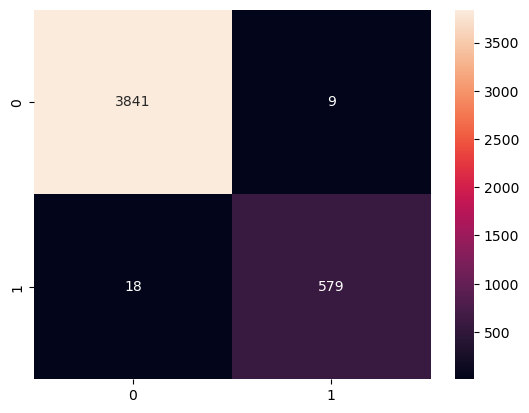

In [79]:
# Calculate and display the confusion matrix for the training predictions
cm=confusion_matrix(y_train, y_predict_train)

# Create a heatmap and format the annotations to regular numeric notation
sns.heatmap(cm, annot=True, fmt='d')


In [80]:
y_predict_test=NB_classifier.predict(X_test)
y_predict_test

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [81]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       962
           1       0.93      0.93      0.93       150

    accuracy                           0.98      1112
   macro avg       0.96      0.96      0.96      1112
weighted avg       0.98      0.98      0.98      1112



In [84]:
# Test a Naive Baye's filtering for a new email text for classification
new_email = ["Dear John this is your first notice to collect your 4* Tenerife Vacation or #1000 CASH award! Call 09061743806 from a phone. TCs SAE Box326 CW25WX 150ppm"] #spam
#new_email = ["K..give back my thanks."] #non-spam

# Transform the new email text using the same vectorizer
new_email_vectorized = vectorizer.transform(new_email)

# Make a prediction for the new email
prediction = NB_classifier.predict(new_email_vectorized)

# Check if it's spam or not based on the prediction
print (prediction)
if prediction[0] == 1:
    print("The new email is classified as SPAM.")
else:
    print("The new email is classified as HAM.")


[1]
The new email is classified as SPAM.
